### we need to create a classification model to determine if the restaurant is good or not based on the rated column , so we will create a new column from it which equal to 1 if the rate is greater than 3.7 and 0 

Columns description

- url : contains the url of the restaurant in the zomato website

- address : contains the address of the restaurant in Bengaluru

- name : contains the name of the restaurant

- online_order : whether online ordering is available in the restaurant or not

- book_table : table book option available or not

- rate : contains the overall rating of the restaurant out of 5

- votes : contains total number of rating for the restaurant as of the above mentioned date

- phone : contains the phone number of the restaurant

- location : contains the neighborhood in which the restaurant is located

- rest_type : restaurant type

- dish_liked : dishes people liked in the restaurant

- cuisines : food styles, separated by comma

- approx_cost(for two people): contains the approximate cost for meal for two people

- reviews_list : list of tuples containing reviews for the restaurant, each tuple

- menu_item contains l: ist of menus available in the restaurant

- listed_in(type) : type of meal

- listed_in(city) : contains the neighborhood in which the restaurant is listed

# import the libraries 

In [1]:
#Main libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import pickle
from bs4 import BeautifulSoup
sns.set(rc={'figure.figsize': [15, 9]}, font_scale=1.3)

#Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Algorithms
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

#Tuning
from sklearn.model_selection import GridSearchCV

#Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

## import the dataset

In [2]:
df = pd.read_csv('zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

# Deal With Null and Duplicated Raws 

In [4]:
for col in df.columns:
    print(col,':',df[col].nunique())
    print(df[col].value_counts().nlargest(7))
    print('\n'+'*'*20+'\n')

url : 51717
https://www.zomato.com/bangalore/jalsa-banashankari?context=eyJzZSI6eyJlIjpbNTg2OTQsIjE4Mzc1NDc0IiwiNTkwOTAiLCIxODM4Mjk0NCIsIjE4MjI0Njc2IiwiNTkyODkiLCIxODM3MzM4NiJdLCJ0IjoiUmVzdGF1cmFudHMgaW4gQmFuYXNoYW5rYXJpIHNlcnZpbmcgQnVmZmV0In19                                                                                                                                                                                                                                            1
https://www.zomato.com/bangalore/al-hayath-btm-bangalore?context=eyJzZSI6eyJlIjpbIjUyNTMwIiwiMTg3ODEzNjAiLCIxODc5MTA5MiIsIjE4ODI0MTc0Iiw2MTIxMCwiNTA2NjkiLCIxODY4MDEwNCIsIjE4MTQwNzgwIiwiMTg4NDU0NzYiLCIxODc4NTExMiIsIjE4NjY3NjQ1IiwiMTg3ODExMDUiLCI1NTM3MyIsIjE4NjgwNTAzIiwiMTg0MTc1OTYiXSwidCI6IkRpbmUtT3V0IFJlc3RhdXJhbnRzIGluIEtvcmFtYW5nYWxhIDZ0aCBCbG9jayJ9fQ==                                                                                                               1
https://www.zomato.com/bangalore/donne-biriyani-

menu_item : 9098
[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [5]:
#from the cell value_counts we know 
#NEW and [] its mean Null value

In [6]:
df['menu_item'] = df['menu_item'].replace('[]', np.nan)
df['rate'] = df['rate'].replace('NEW', np.nan)
df['reviews_list'] = df['reviews_list'].replace('[]', np.nan)
df['menu_item'] = df['menu_item'].replace('[]', np.nan)

In [7]:
#droping some columns that will not help us 
df = df.drop('phone',1)

C:\Users\mohammed\AppData\Local\Temp/ipykernel_17912/2694876686.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('phone',1)


In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            9983
votes                              0
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                    7595
menu_item                      39617
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

# Functions

In [10]:
def get_area(x):
    try:
        return x.split(',')[-3]
    except :
        return x
########################################   
#from the rate we decide if the restaurant above 3.7  then its success restaurant
def succ_res(x):
    if x >= 3.7 :
        return 1
    else :
        return 0
########################################
def rest_type(Type):
    if Type in rest_type_dic:
        return rest_type_dic[Type]
    else :
        return 'The type Not Found'
########################################
def Area(Area):
    if Area in Area_dic:
        return Area_dic[Area]
    else :
        return 'The Area Not Found'
########################################
def Pie(df,feature,Limit=20) : 
    fig, ax = plt.subplots(figsize=(10,6))
    plt.pie(df[feature].value_counts()[:Limit],labels=list(
        df[feature].value_counts()[:Limit].index),
        autopct ='%1.2f%%' , labeldistance = 1.1,
            explode = [0.05 for i in range(len(df[feature].value_counts()[:Limit]))] )
    plt.show()     

# Processing Data

### Drop columns that have more than 30% of NANs

In [11]:
rate = len(df[df['rate'].isnull()]) / len(df)
location = len(df[df['location'].isnull()]) / len(df)
rest_type = len(df[df['rest_type'].isnull()]) / len(df)
dish_liked = len(df[df['dish_liked'].isnull()]) / len(df)
cuisines = len(df[df['cuisines'].isnull()]) / len(df)
approx_cost_for_two_people = len(df[df['approx_cost(for two people)'].isnull()]) / len(df)
menu_item = len(df[df['menu_item'].isnull()]) / len(df)
reviews_list = len(df[df['reviews_list'].isnull()]) / len(df)

In [12]:
print('rate: ', rate)
print('location: ',location)
print('rest_type: ',rest_type)
print('dish_liked: ',dish_liked)
print('cuisines: ',cuisines)
print('approx_cost_for_two_people: ',approx_cost_for_two_people)
print('menu_item: ',menu_item)
print('reviews_list: ',reviews_list)

rate:  0.19303130498675483
location:  0.00040605603573293117
rest_type:  0.00438927238625597
dish_liked:  0.5429162557766305
cuisines:  0.0008701200765705668
approx_cost_for_two_people:  0.00669025658874258
menu_item:  0.7660343794110254
reviews_list:  0.1468569329234101


In [13]:
df = df.drop(columns=['dish_liked','menu_item'])

## Fill the Null in rates column with the Url
#### Since we have links of the restaurants, we will try to fill in the Null by entering the links and extracting the missing data using BS4

In [14]:
df[(df['rate'].isnull())]

,url,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
72,https://www.zomato.com/bangalore/spicy-tandoor...,"Opposite ICICi Bank, Hanuman Nagar, Banashanka...",Spicy Tandoor,No,No,NaN,0,Banashankari,Quick Bites,North Indian,150,"[('Rated 4.0', 'RATED\n cost for chicken roll...",Delivery,Banashankari
75,https://www.zomato.com/bangalore/om-sri-vinaya...,"39, S B M Colony, Near-Sita Circle, 1st Stage,...",Om Sri Vinayaka Chats,No,No,NaN,0,Banashankari,"Takeaway, Delivery","Street Food, Fast Food",500,NaN,Delivery,Banashankari
84,https://www.zomato.com/bangalore/chill-out-ban...,"161/C, 6th Main, 80 Feet Road, Bhuvaneshwari N...",Chill Out,No,No,NaN,0,Banashankari,Quick Bites,"South Indian, Chinese",100,"[('Rated 4.0', 'RATED\n Good Location. Small ...",Delivery,Banashankari
90,https://www.zomato.com/bangalore/me-and-my-cak...,"BDA Shopping Complex, 24th Cross Road, Siddann...",Me And My Cake,No,No,NaN,0,Banashankari,Delivery,"Bakery, Desserts",500,"[('Rated 1.0', 'RATED\n Do not order anything...",Delivery,Banashankari
91,https://www.zomato.com/bangalore/sunsadm-banas...,"Shop 18 , 3rd cross road,Markandeya Layout, Ba...",Sunsadm,No,No,NaN,0,Banashankari,"Takeaway, Delivery",South Indian,400,NaN,Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51644,https://www.zomato.com/bangalore/punjabi-thadk...,"7/3, ASK Tower, Kundanahalli Gate, Next to Bat...",Punjabi Thadka,No,No,NaN,0,Brookefield,Quick Bites,North Indian,400,NaN,Dine-out,Whitefield
51675,https://www.zomato.com/bangalore/topsy-turvey-...,"2E2, 4th Cross Road, Devasandra Industrial Est...",Topsy Turvey,No,No,NaN,0,Whitefield,Bar,Finger Food,900,"[('Rated 4.0', ""RATED\n A divine joint for Fl...",Drinks & nightlife,Whitefield
51710,https://www.zomato.com/bangalore/topsy-turvey-...,"2E2, 4th Cross Road, Devasandra Industrial Est...",Topsy Turvey,No,No,NaN,0,Whitefield,Bar,Finger Food,900,"[('Rated 4.0', ""RATED\n A divine joint for Fl...",Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,Finger Food,600,NaN,Pubs and bars,Whitefield


In [15]:
response = requests.get('https://www.zomato.com/bangalore/just-sandwiches-btm')
soup = BeautifulSoup(response.text, "html.parser")

In [16]:
soup

<html><head>
<title>Access Denied</title>
</head><body>
<h1>Access Denied</h1>
 
You don't have permission to access "http://www.zomato.com/bangalore/just-sandwiches-btm" on this server.<p>
Reference #18.267b655f.1668341247.7c2c7bea
</p></body>
</html>

#### the Site does't give Access anymore then we will just delet the null data :(

In [17]:
df = df.drop(columns=['url'])

In [18]:
df.dropna(inplace=True)

In [19]:
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)

# Pre-process

# address Column

In [20]:
df['address'].describe()

count             40173
unique             8511
top       Delivery Only
freq                 82
Name: address, dtype: object

In [21]:
df=df.drop(df[(df['address']=='Delivery Only')].index)

In [22]:
df['address'][40172]
#from adress we can get the area

'ITPL Main Road, KIADB Export Promotion Industrial Area, ITPL Main Road, Whitefield'

In [23]:
df['Area'] = df['address'].apply(get_area)

In [24]:
df['Area'].value_counts(())

 2nd Stage                        1195
 1st Stage                         582
 4th Block                         544
 80 Feet Road                      531
 KHB Colony                        472
                                  ... 
Padmanabhanagar                      1
 Ashwini Layout                      1
Sri Garuda Mall                      1
 Near J N C College                  1
 Opposite Sigma Soft Tech Park       1
Name: Area, Length: 3758, dtype: int64

In [25]:
df = df.drop(columns=['address'])

# rate Column

In [26]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5', '4.5/5',
       '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '3.4 /5',
       '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5',
       '3.7 /5', '2.9 /5', '3.3 /5', '2.8 /5', '-', '3.5 /5', '2.7 /5',
       '3.2 /5', '3.1 /5', '2.6 /5', '4.5 /5', '4.3 /5', '4.4 /5',
       '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5', '4.9 /5', '2.5 /5',
       '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [27]:
df[(df['rate']=='-')]

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city),Area
2640,Mezban Family Restaurant,Yes,No,-,0,Basavanagudi,Quick Bites,"Chinese, North Indian",300,"[('Rated 5.0', 'RATED\n Food was delicious es...",Dine-out,Basavanagudi,Lalbagh Fort Road
2656,Aahar Cafe,No,No,-,0,Basavanagudi,Quick Bites,South Indian,100,"[('Rated 1.0', 'RATED\n Ververy bad.....not g...",Dine-out,Basavanagudi,North Anjaneya Temple Street
2666,Oasis Food Center,No,No,-,0,Basavanagudi,Quick Bites,Fast Food,150,"[('Rated 4.0', 'RATED\n One stop shop for che...",Dine-out,Basavanagudi,Behind BMS College
2667,Hotel Trupthi,No,No,-,0,Basavanagudi,Quick Bites,"South Indian, Chinese, North Indian",200,"[('Rated 5.0', 'RATED\n One of the best Cante...",Dine-out,Basavanagudi,Chikkanna Garden
2683,Brahmin Tiffins & Coffee,No,No,-,0,Basavanagudi,Quick Bites,"South Indian, Beverages",100,"[('Rated 5.0', 'RATED\n Best place to have id...",Dine-out,Basavanagudi,V V Puram
12307,Village Kitchen,Yes,No,-,0,HSR,Quick Bites,"South Indian, Kerala, Chinese",250,"[('Rated 1.0', 'RATED\n I was not expecting t...",Delivery,HSR,Sector 7
14316,Cake N Cream,No,No,-,0,Jeevan Bhima Nagar,Bakery,"Bakery, Desserts",360,"[('Rated 3.0', ""RATED\n Got this cake in thip...",Desserts,Indiranagar,10th Main
25888,Al-Hyatt,No,No,-,0,Ejipura,Quick Bites,"Biryani, Chinese",300,"[('Rated 3.0', ""RATED\n Decent road side food...",Delivery,Koramangala 6th Block,Opp. Cherry Electricals
25889,Sugary Bakers - A Boutique Bakery,No,No,-,0,Koramangala 3rd Block,Bakery,"Bakery, Desserts",200,"[('Rated 5.0', 'RATED\n Truly a boutique bake...",Delivery,Koramangala 6th Block,8th Main Road
25890,Sapfresh,No,No,-,0,Koramangala 4th Block,Delivery,Beverages,150,"[('Rated 5.0', 'RATED\n Great Packaging'), ('...",Delivery,Koramangala 6th Block,6th cross


In [28]:
df=df.drop(df[(df['rate']=='-')].index)

In [29]:
df['Rating_from_5'] = df['rate'].apply(lambda x : float(x.split('/')[0]))
df['rate'] = df['rate'].apply(lambda x: x.replace('/5',''))

In [30]:
df['success_restaurant'] = df['Rating_from_5'].apply(succ_res)

In [31]:
df['success_restaurant'].value_counts()

1    23670
0    16399
Name: success_restaurant, dtype: int64

In [32]:
df = df.drop(columns=['rate'])

# location Column

In [33]:
df['location'][40172]
#some rows have 2 elemnt

'ITPL Main Road, Whitefield'

In [34]:
df['location'] = df['location'].apply(lambda x : x.split(',')[-1])

# rest_type Column

In [35]:
df['rest_type'].value_counts()

Quick Bites                   13319
Casual Dining                  9467
Cafe                           3313
Dessert Parlor                 1840
Delivery                       1552
                              ...  
Dessert Parlor, Kiosk             2
Cafe, Food Court                  2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Name: rest_type, Length: 86, dtype: int64

In [36]:
df['multiple_types'] = df['rest_type'].apply(lambda x :  len(x.split(',')))

In [37]:
df['multiple_types'].value_counts()

1    33824
2     6245
Name: multiple_types, dtype: int64

# cuisines Column

In [38]:
df['cuisines'].value_counts()

North Indian                               2054
North Indian, Chinese                      1864
South Indian                               1191
Bakery, Desserts                            595
Cafe                                        590
                                           ... 
Chinese, Thai, Pan Asian                      1
Mediterranean, Arabian, Lebanese, Rolls       1
Cafe, Continental, Steak                      1
Beverages, Juices, Ice Cream, Fast Food       1
North Indian, Chinese, Arabian, Momos         1
Name: cuisines, Length: 2327, dtype: int64

In [39]:
df['total_cuisines'] = df['cuisines'].apply(lambda x :  len(x.split(',')))

In [40]:
df['total_cuisines'].value_counts()

2    13366
3    10053
1     8477
4     5203
5     1834
6      622
7      356
8      158
Name: total_cuisines, dtype: int64

# approx_cost(for two people) Column

In [41]:
df['approx_cost(for two people)'].describe()

count     40069
unique       62
top         400
freq       5138
Name: approx_cost(for two people), dtype: object

In [42]:
df['approx_cost'] = df['approx_cost(for two people)'].astype(str).apply(lambda x: x.replace(',', ''))
df['approx_cost'] = df['approx_cost'].astype(int)

In [43]:
df = df.drop(columns=['approx_cost(for two people)'])

# reviews_list Column

In [44]:
AllDescription = ' '.join(df['reviews_list'].tolist())
AllDescription = ' '.join([(i).lower() for i in AllDescription.split()])
len(AllDescription)

481737642

In [45]:
len(AllDescription.split())

72662614

In [46]:
MostRepeatedWords = {}

for Word in AllDescription.split() : 
    if Word in MostRepeatedWords.keys() : 
        MostRepeatedWords[Word] +=1
    else : 
        MostRepeatedWords[Word] =1
MostRepeatedWords

{"[('rated": 40069,
 "4.0',": 396943,
 "'rated\\n": 936723,
 'a': 1588654,
 'beautiful': 26155,
 'place': 773163,
 'to': 1354505,
 'dine': 10197,
 'in.the': 19,
 'interiors': 11579,
 'take': 38772,
 'you': 405033,
 'back': 48632,
 'the': 3269966,
 'mughal': 784,
 'era.': 101,
 'lightings': 454,
 'are': 400202,
 'just': 189429,
 'perfect.we': 9,
 'went': 87892,
 'there': 166675,
 'on': 408379,
 'occasion': 2263,
 'of': 1019094,
 'christmas': 3234,
 'and': 2455535,
 'so': 247938,
 'they': 427684,
 'had': 351097,
 'only': 105905,
 'limited': 13654,
 'items': 51040,
 'available.': 6988,
 'but': 437972,
 'taste': 186455,
 'service': 230692,
 'was': 1399070,
 'not': 428492,
 'compromised': 652,
 'at': 222869,
 'all.the': 124,
 'complaint': 2244,
 'is': 1339143,
 'that': 309377,
 'breads': 4432,
 'could': 59543,
 'have': 436560,
 'been': 124834,
 'better.would': 9,
 'surely': 15134,
 'like': 191825,
 'come': 41109,
 'here': 182849,
 "again.'),": 11210,
 "('rated": 1252156,
 'i': 906717,
 'for

In [47]:
len(MostRepeatedWords.keys())

295152

In [48]:
MostRepeatedWords=  {k:v for k,v in sorted(
    MostRepeatedWords.items(),key = lambda
    item: item[1],reverse = True) }
MostRepeatedWords

{'the': 3269966,
 'and': 2455535,
 'a': 1588654,
 'was': 1399070,
 'to': 1354505,
 'is': 1339143,
 "('rated": 1252156,
 'of': 1019094,
 "'rated\\n": 936723,
 'i': 906717,
 'for': 888063,
 'place': 773163,
 'with': 724999,
 'in': 715322,
 'it': 654445,
 'food': 637815,
 'this': 633350,
 'good': 609049,
 'we': 447945,
 'very': 442852,
 'but': 437972,
 'have': 436560,
 'not': 428492,
 'they': 427684,
 'on': 408379,
 'you': 405033,
 'are': 400202,
 "4.0',": 396943,
 "5.0',": 371278,
 '"rated\\n': 353281,
 'had': 351097,
 'chicken': 340951,
 'were': 330642,
 'that': 309377,
 'as': 305621,
 'my': 284291,
 'ordered': 283742,
 'their': 262606,
 'which': 249317,
 'so': 247938,
 'really': 243738,
 'one': 232057,
 'service': 230692,
 'at': 222869,
 'all': 219169,
 'be': 216419,
 'from': 207673,
 'great': 206345,
 'also': 205712,
 '-': 198743,
 'like': 191825,
 'just': 189429,
 'taste': 186455,
 'here': 182849,
 'ambience': 180113,
 "3.0',": 177748,
 'try': 174399,
 'there': 166675,
 'if': 165905,

In [49]:
ImportantWords = ['good','great','nice','best',
                  'loved','amazing','love','worth',
                  'pretty','friendly','decent','perfect',
                  'awesome','delicious','liked','good','special',
                  'sweet','enjoy','great','happy','excellent','yummy','beautiful','lovely','favourite',
                  'delicious','fast','recommended','nice.','unique','wonderful','awesome.','cheap'] 

In [50]:
for Word in ImportantWords : 
    df['Good_review_Word'] = df['reviews_list'].apply(lambda x : 1 if Word in x.lower() else 0)

In [51]:
df['Good_review_Word'].value_counts()

0    34597
1     5472
Name: Good_review_Word, dtype: int64

In [52]:
df = df.drop(columns=['reviews_list'])

In [53]:
df

,name,online_order,book_table,votes,location,rest_type,cuisines,listed_in(type),listed_in(city),Area,Rating_from_5,success_restaurant,multiple_types,total_cuisines,approx_cost,Good_review_Word
0,Jalsa,Yes,Yes,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",Buffet,Banashankari,2nd Stage,4.1,1,1,3,800,0
1,Spice Elephant,Yes,No,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",Buffet,Banashankari,3rd Stage,4.1,1,1,3,800,1
2,San Churro Cafe,Yes,No,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",Buffet,Banashankari,2nd Stage,3.8,1,2,3,800,0
3,Addhuri Udupi Bhojana,No,No,88,Banashankari,Quick Bites,"South Indian, North Indian",Buffet,Banashankari,3rd Stage,3.7,1,1,2,300,0
4,Grand Village,No,No,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",Buffet,Banashankari,Above Reliance Trends,3.8,1,1,2,600,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40168,The Farm House Bar n Grill,No,No,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",Pubs and bars,Whitefield,KIADB Export Promotion Industrial Area,3.7,1,2,2,800,0
40169,Bhagini,No,No,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",Pubs and bars,Whitefield,Main Road,2.5,0,2,4,800,0
40170,Best Brews - Four Points by Sheraton Bengaluru...,No,No,27,Whitefield,Bar,Continental,Pubs and bars,Whitefield,Whitefield Main Road,3.6,0,1,1,1500,0
40171,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,236,Whitefield,Bar,Finger Food,Pubs and bars,Whitefield,Prestige Shantiniketan,4.3,1,1,1,2500,0


# visualizations 

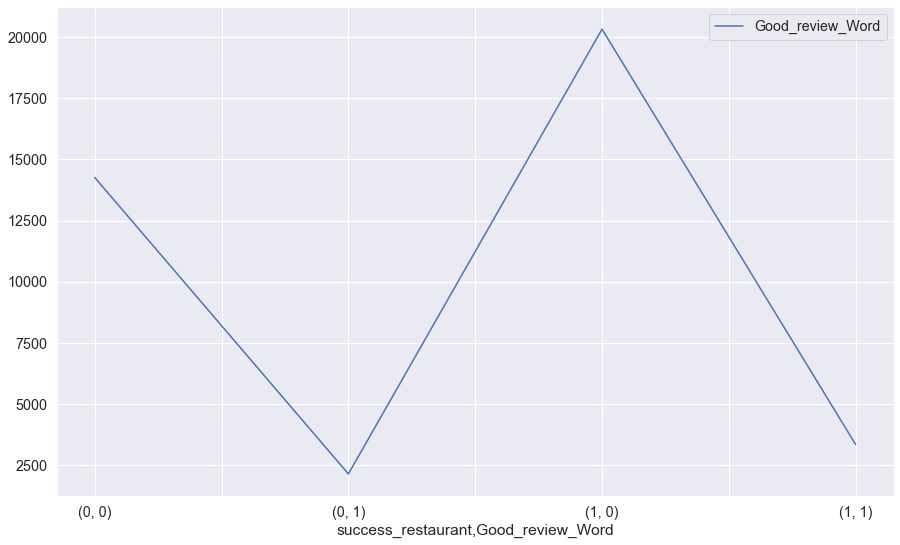

In [54]:
df.groupby('success_restaurant')['Good_review_Word'].value_counts().plot(legend=True);

## from the chart up the fillter with good word we see that its does't effect so we will drop it

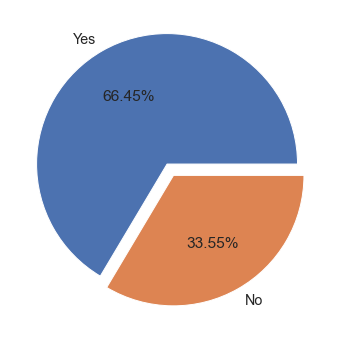

 Availability of online order service  None


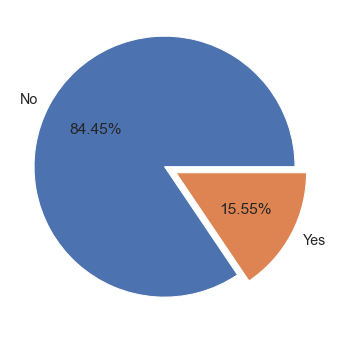

 Availability of pre-booking  None


In [55]:
print(f' Availability of online order service  {Pie(df,"online_order")}')
print(f' Availability of pre-booking  {Pie(df,"book_table")}')

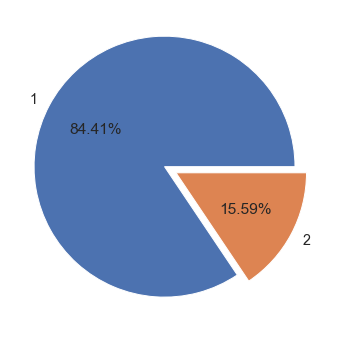

In [56]:
Pie(df,'multiple_types')

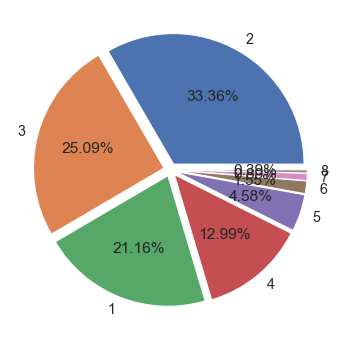

In [57]:
Pie(df,'total_cuisines')

#from this chart we can seid that almost resturant foucs on 1 ,2 or 3 cuisines of food

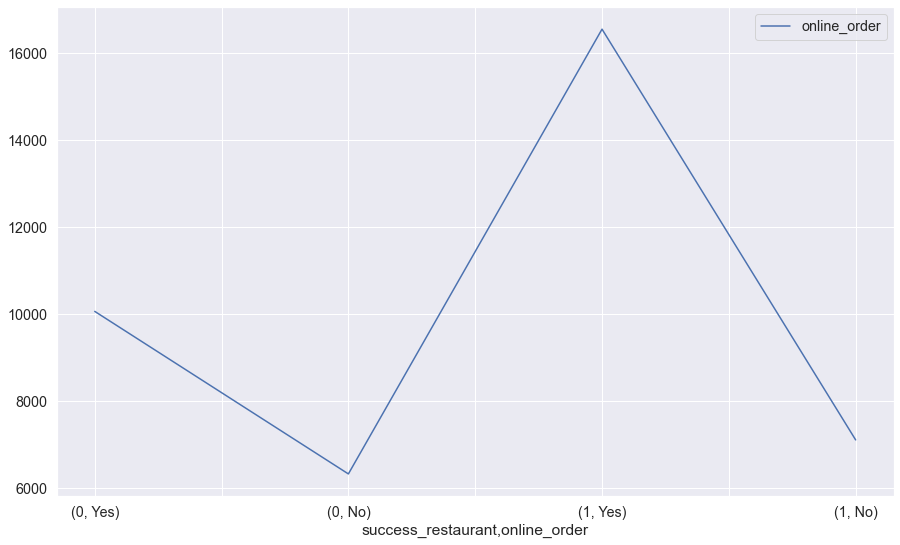

In [58]:
df.groupby('success_restaurant')['online_order'].value_counts().plot(legend=True);
#from this plot we can see that resturant with online service more success

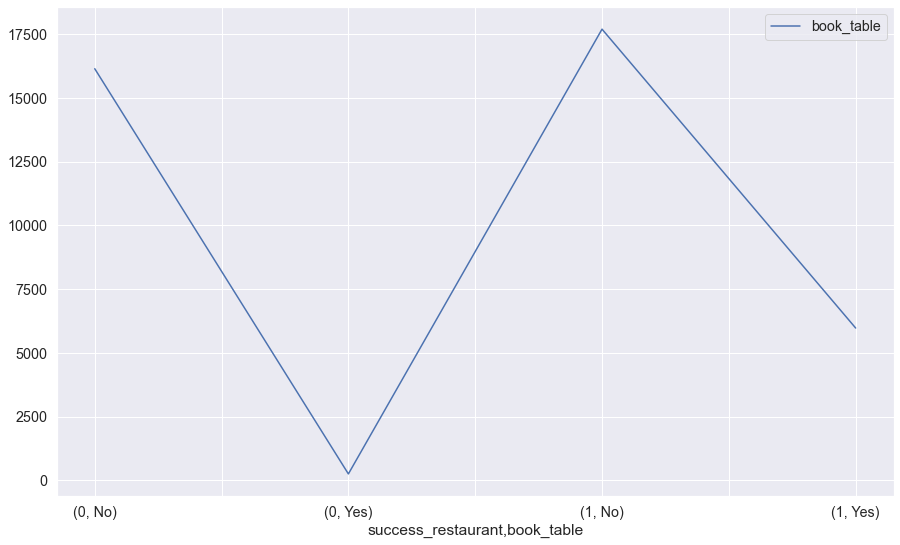

In [59]:
df.groupby('success_restaurant')['book_table'].value_counts().plot(legend=True);
#from this plot we can see that resturant with not book_table service more success

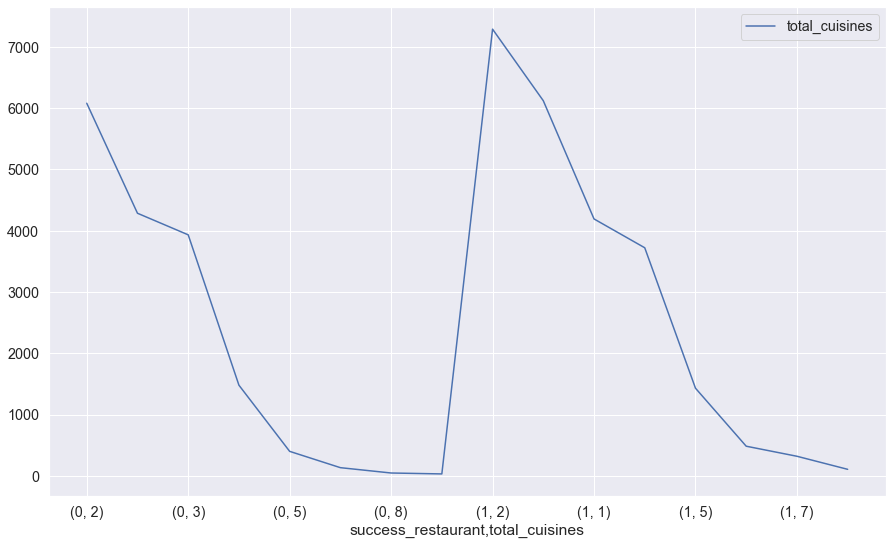

In [60]:
df.groupby('success_restaurant')['total_cuisines'].value_counts().plot(legend=True);
#from this plot we can see that resturant with 2 or 1 Cuisines more success

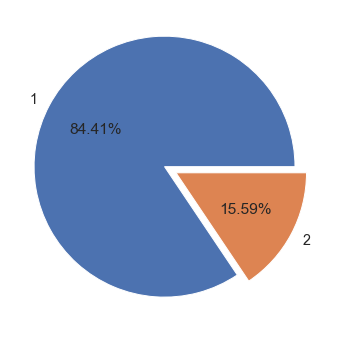

In [61]:
Pie(df,'multiple_types')

# Data Preparing

In [62]:
df = df.replace('Yes','1').replace('No','0')
df

,name,online_order,book_table,votes,location,rest_type,cuisines,listed_in(type),listed_in(city),Area,Rating_from_5,success_restaurant,multiple_types,total_cuisines,approx_cost,Good_review_Word
0,Jalsa,1,1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",Buffet,Banashankari,2nd Stage,4.1,1,1,3,800,0
1,Spice Elephant,1,0,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",Buffet,Banashankari,3rd Stage,4.1,1,1,3,800,1
2,San Churro Cafe,1,0,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",Buffet,Banashankari,2nd Stage,3.8,1,2,3,800,0
3,Addhuri Udupi Bhojana,0,0,88,Banashankari,Quick Bites,"South Indian, North Indian",Buffet,Banashankari,3rd Stage,3.7,1,1,2,300,0
4,Grand Village,0,0,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",Buffet,Banashankari,Above Reliance Trends,3.8,1,1,2,600,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40168,The Farm House Bar n Grill,0,0,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",Pubs and bars,Whitefield,KIADB Export Promotion Industrial Area,3.7,1,2,2,800,0
40169,Bhagini,0,0,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",Pubs and bars,Whitefield,Main Road,2.5,0,2,4,800,0
40170,Best Brews - Four Points by Sheraton Bengaluru...,0,0,27,Whitefield,Bar,Continental,Pubs and bars,Whitefield,Whitefield Main Road,3.6,0,1,1,1500,0
40171,Chime - Sheraton Grand Bengaluru Whitefield Ho...,0,1,236,Whitefield,Bar,Finger Food,Pubs and bars,Whitefield,Prestige Shantiniketan,4.3,1,1,1,2500,0


In [63]:
Area_key = list(df['Area'].unique())
rest_type_key = list(df['rest_type'].unique())

In [64]:
# the socond method is label encoding in sklearn


encoder = LabelEncoder()
df['Area'] = encoder.fit_transform(df['Area'])
df['rest_type'] = encoder.fit_transform(df['rest_type'])

In [65]:
Area_values = list(df['Area'].unique())
rest_type_values = list(df['rest_type'].unique())

In [66]:
rest_type_dic = {}
for key in rest_type_key:
    for value in rest_type_values:
        rest_type_dic[key] = value
        rest_type_values.remove(value)
        break
#######################################
Area_dic = {}
for key in Area_key:
    for value in Area_values:
        Area_dic[key] = value
        Area_values.remove(value)
        break

                       votes  rest_type      Area  Rating_from_5  \
votes               1.000000  -0.142753 -0.040889       0.432724   
rest_type          -0.142753   1.000000  0.034273      -0.219697   
Area               -0.040889   0.034273  1.000000      -0.076778   
Rating_from_5       0.432724  -0.219697 -0.076778       1.000000   
success_restaurant  0.281799  -0.214297 -0.081605       0.803917   
multiple_types      0.200572  -0.019675  0.020925       0.174062   
total_cuisines      0.224381  -0.177356 -0.008549       0.202138   
approx_cost         0.367279  -0.335010 -0.040662       0.381883   
Good_review_Word    0.125534   0.032538  0.000560       0.019896   

                    success_restaurant  multiple_types  total_cuisines  \
votes                         0.281799        0.200572        0.224381   
rest_type                    -0.214297       -0.019675       -0.177356   
Area                         -0.081605        0.020925       -0.008549   
Rating_from_5          

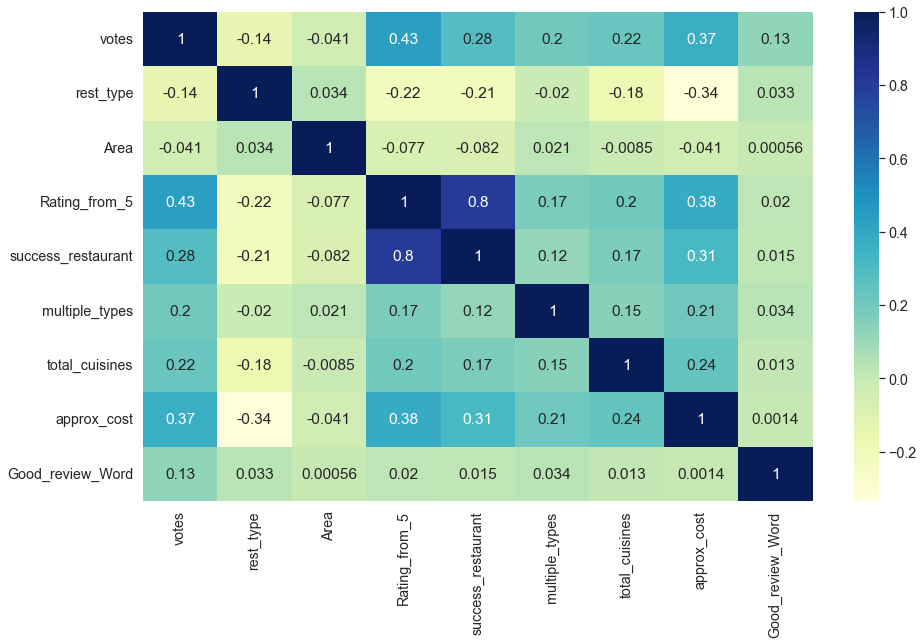

In [67]:
print(df.corr())
  
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [68]:
# define dictionary
Area_dic , rest_type_dic

# create a binary pickle file 
a = open("Area_dic.pkl","wb")
r = open("rest_type_dic.pkl","wb")
# write the python object (dict) to pickle file
pickle.dump(Area_dic,a)
pickle.dump(rest_type_dic,r)

# close file
a.close()
r.close()

In [69]:
df.corr().T['success_restaurant']

votes                 0.281799
rest_type            -0.214297
Area                 -0.081605
Rating_from_5         0.803917
success_restaurant    1.000000
multiple_types        0.117668
total_cuisines        0.174628
approx_cost           0.313080
Good_review_Word      0.015449
Name: success_restaurant, dtype: float64

In [70]:
#droping some columns that will not help us 
df = df.drop(['name','votes','cuisines','listed_in(type)','listed_in(city)','Good_review_Word','Rating_from_5','location'],1)
df

C:\Users\mohammed\AppData\Local\Temp/ipykernel_17912/2229445528.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(['name','votes','cuisines','listed_in(type)','listed_in(city)','Good_review_Word','Rating_from_5','location'],1)


,online_order,book_table,rest_type,Area,success_restaurant,multiple_types,total_cuisines,approx_cost
0,1,1,23,169,1,1,3,800
1,1,0,23,200,1,1,3,800
2,1,0,18,169,1,2,3,800
3,0,0,72,200,1,1,2,300
4,0,0,23,364,1,1,2,600
...,...,...,...,...,...,...,...,...
40168,0,0,24,1362,1,2,2,800
40169,0,0,24,1645,0,2,4,800
40170,0,0,5,3199,0,1,1,1500
40171,0,1,5,2704,1,1,1,2500


In [71]:
X = df.drop('success_restaurant', axis=1)
y = df[['success_restaurant']]

In [72]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25 , random_state = 44 , shuffle = True)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((30051, 7), (10018, 7), (30051, 1), (10018, 1))

# Classification Models

In [73]:
GaussianNBModel = GaussianNB()
MultinomialNBModel = MultinomialNB(alpha=1.0)
BernoulliNBModel = BernoulliNB(alpha=1.0,binarize=1)
LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',C=1.0,random_state=33)
SGDClassifierModel = SGDClassifier(penalty='l2',loss='squared_loss',learning_rate='optimal',random_state=33)
RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=300,max_depth=7,random_state=33) 
GBCModel = GradientBoostingClassifier(n_estimators=100,max_depth=3,random_state=33) 
QDAModel = QuadraticDiscriminantAnalysis(tol=0.0001)
SVCModel = SVC(kernel= 'rbf',max_iter=100,C=1.0,gamma='auto')
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=33)
KNNClassifierModel = KNeighborsClassifier(n_neighbors= 5,weights ='uniform',algorithm='auto') 

Models = [GaussianNBModel,KNNClassifierModel,MultinomialNBModel,
          BernoulliNBModel,LogisticRegressionModel,RandomForestClassifierModel,
          GBCModel,SGDClassifierModel,QDAModel,SVCModel,DecisionTreeClassifierModel]

In [74]:
ModelsScore = {}
for Model in Models : 
    print(f'for Model {str(Model).split("(")[0]}')
    Model.fit(X_train, y_train.values.ravel())
    print(f'Train Score is : {Model.score(X_train, y_train)}')
    print(f'Test Score is : {Model.score(X_test, y_test)}')
    y_pred = Model.predict(X_test)
    ClassificationReport = classification_report(y_test,y_pred)
    print('Classification Report is : \n', ClassificationReport )
    print(f'Precision value is  : {ClassificationReport.split()[19]}')
    print(f'Recall value is  : {ClassificationReport.split()[20]}')
    print(f'F1 Score value is  : {ClassificationReport.split()[21]}')
    ModelsScore[str(Model).split("(")[0]] = [ClassificationReport.split()[19],
                                             ClassificationReport.split()[20],ClassificationReport.split()[21]]
    print('=================================================')    


for Model GaussianNB
Train Score is : 0.6051379321819573
Test Score is : 0.6045118786184868
Classification Report is : 
               precision    recall  f1-score   support

           0       0.51      0.91      0.66      4132
           1       0.86      0.39      0.54      5886

    accuracy                           0.60     10018
   macro avg       0.69      0.65      0.60     10018
weighted avg       0.72      0.60      0.59     10018

Precision value is  : 0.69
Recall value is  : 0.65
F1 Score value is  : 0.60
for Model KNeighborsClassifier
Train Score is : 0.9171741372999235
Test Score is : 0.8632461569175485
Classification Report is : 
               precision    recall  f1-score   support

           0       0.84      0.82      0.83      4132
           1       0.88      0.89      0.88      5886

    accuracy                           0.86     10018
   macro avg       0.86      0.86      0.86     10018
weighted avg       0.86      0.86      0.86     10018

Precision value i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Train Score is : 0.6464343948620678
Test Score is : 0.6465362347774006
Classification Report is : 
               precision    recall  f1-score   support

           0       0.58      0.52      0.55      4132
           1       0.69      0.73      0.71      5886

    accuracy                           0.65     10018
   macro avg       0.63      0.63      0.63     10018
weighted avg       0.64      0.65      0.64     10018

Precision value is  : 0.63
Recall value is  : 0.63
F1 Score value is  : 0.63
for Model RandomForestClassifier
Train Score is : 0.7072975940900469
Test Score is : 0.6985426232780995
Classification Report is : 
               precision    recall  f1-score   support

           0       0.65      0.59      0.62      4132
           1       0.73      0.77      0.75      5886

    accuracy                           0.70     10018
   macro avg       0.69      0.68      0.68     10018
weighted avg       0.70      0.70      0.70     10018

Precision value is  : 0.69
Recall va

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Train Score is : 0.40813949618981066
Test Score is : 0.41225793571571173
Classification Report is : 
               precision    recall  f1-score   support

           0       0.41      1.00      0.58      4132
           1       0.00      0.00      0.00      5886

    accuracy                           0.41     10018
   macro avg       0.21      0.50      0.29     10018
weighted avg       0.17      0.41      0.24     10018

Precision value is  : 0.21
Recall value is  : 0.50
F1 Score value is  : 0.29
for Model QuadraticDiscriminantAnalysis
Train Score is : 0.5977172140694154
Test Score is : 0.5955280495108805
Classification Report is : 
               precision    recall  f1-score   support

           0       0.51      0.92      0.65      4132
           1       0.87      0.37      0.52      5886

    accuracy                           0.60     10018
   macro avg       0.69      0.64      0.58     10018
weighted avg       0.72      0.60      0.57     10018

Precision value is  : 0.69


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Train Score is : 0.4144953578915843
Test Score is : 0.41794769415052907
Classification Report is : 
               precision    recall  f1-score   support

           0       0.41      1.00      0.59      4132
           1       0.88      0.01      0.02      5886

    accuracy                           0.42     10018
   macro avg       0.65      0.50      0.30     10018
weighted avg       0.69      0.42      0.25     10018

Precision value is  : 0.65
Recall value is  : 0.50
F1 Score value is  : 0.30
for Model DecisionTreeClassifier
Train Score is : 0.6449036637715883
Test Score is : 0.6507286883609503
Classification Report is : 
               precision    recall  f1-score   support

           0       0.58      0.54      0.56      4132
           1       0.69      0.73      0.71      5886

    accuracy                           0.65     10018
   macro avg       0.64      0.63      0.64     10018
weighted avg       0.65      0.65      0.65     10018

Precision value is  : 0.64
Recall v

# KNNClassifierModel Tuning

In [75]:
k_range = list(range(1,35))
weight_options = ["uniform", "distance"]
param_grid = dict(n_neighbors = k_range, weights = weight_options)
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy')
grid.fit(X,y.values.ravel())
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.9166433840629123
{'n_neighbors': 20, 'weights': 'distance'}
KNeighborsClassifier(n_neighbors=20, weights='distance')


In [76]:
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.913025,0.042975,"{'n_neighbors': 1, 'weights': 'uniform'}"
1,0.913025,0.042975,"{'n_neighbors': 1, 'weights': 'distance'}"
2,0.893433,0.053941,"{'n_neighbors': 2, 'weights': 'uniform'}"
3,0.913075,0.043412,"{'n_neighbors': 2, 'weights': 'distance'}"
4,0.882602,0.052966,"{'n_neighbors': 3, 'weights': 'uniform'}"
...,...,...,...
63,0.916244,0.041807,"{'n_neighbors': 32, 'weights': 'distance'}"
64,0.701789,0.027011,"{'n_neighbors': 33, 'weights': 'uniform'}"
65,0.916369,0.041872,"{'n_neighbors': 33, 'weights': 'distance'}"
66,0.699992,0.028395,"{'n_neighbors': 34, 'weights': 'uniform'}"


In [77]:
print(grid.best_score_)
print(grid.best_params_)

0.9166433840629123
{'n_neighbors': 20, 'weights': 'distance'}


In [78]:
KNNClassifierModel = KNeighborsClassifier(n_neighbors= 31,weights ='distance') 
KNNClassifierModel.fit(X_train, y_train.values.ravel())
print(f'Train Score is : {KNNClassifierModel.score(X_train, y_train)}')
print(f'Test Score is : {KNNClassifierModel.score(X_test, y_test)}')
y_pred = KNNClassifierModel.predict(X_test)
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : \n', ClassificationReport )
print(f'Precision value is  : {ClassificationReport.split()[19]}')
print(f'Recall value is  : {ClassificationReport.split()[20]}')
print(f'F1 Score value is  : {ClassificationReport.split()[21]}')
ModelsScore[str(KNNClassifierModel).split("(")[0]] = [ClassificationReport.split()[19],
                                             ClassificationReport.split()[20],ClassificationReport.split()[21]]

Train Score is : 0.9839938770756381
Test Score is : 0.9477939708524655
Classification Report is : 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      4132
           1       0.96      0.95      0.96      5886

    accuracy                           0.95     10018
   macro avg       0.95      0.95      0.95     10018
weighted avg       0.95      0.95      0.95     10018

Precision value is  : 0.95
Recall value is  : 0.95
F1 Score value is  : 0.95


In [79]:
custom_data = np.array([[0,0,6,2,4,1645,5500]])
prediction = KNNClassifierModel.predict(custom_data)
prediction

array([1], dtype=int64)

In [81]:
pickle.dump(KNNClassifierModel, open('KNNClassifierModel.pkl', 'wb'))